# __Basic_Flopy_example__01__ok__

In [1]:
import os
import sys
import flopy
import flopy.modflow as fpm
import flopy.utils as fpu
import matplotlib as mpl
import numpy as np
from pprint import pformat

In [16]:
# model.write_input()

In [2]:
exe = "mf2005"
ws = os.path.join("temp")
model = fpm.Modflow(modelname="gwexample", exe_name=exe, model_ws=ws)

In [3]:
fpm.ModflowDis(model, nlay=1, nrow=1, ncol=201, delr=10, delc=1, top=50, botm=0)
model.write_input()

In [4]:
ibound = np.ones((1, 201))
ibound[0, 0] = ibound[0, -1] = -1
fpm.ModflowBas(model, ibound=ibound, strt=20)
model.write_input()

In [5]:
fpm.ModflowLpf(model, hk=10, laytyp=1)
model.write_input()

In [6]:
fpm.ModflowRch(model, rech=0.001)
model.write_input()

# __Wells_1,2__

In [17]:
lrcQ = {0: [[0, 0, 50, -1], [0, 0, 150, -1]]}
fpm.ModflowWel(model, stress_period_data=lrcQ)
model.write_input()

In [14]:
fpm.ModflowPcg(model)
model.write_input()

In [9]:
fpm.ModflowOc(model)
model.write_input()

# __*.hds__ __&__ __*.list__ __!__

In [10]:
success, buff = model.run_model(silent=True, report=True)
assert success, pformat(buff)

In [11]:
fpth = os.path.join(ws, "gwexample.hds")
hfile = fpu.HeadFile(fpth)
h = hfile.get_data(totim=1.0)

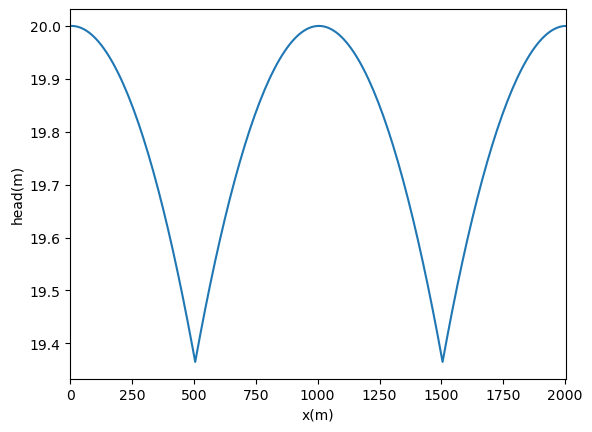

In [12]:
import matplotlib.pyplot as plt

ax = plt.subplot(111)
x = model.modelgrid.xcellcenters[0]
ax.plot(x, h[0, 0, :])
ax.set_xlim(0, x.max())
ax.set_xlabel("x(m)")
ax.set_ylabel("head(m)")
plt.show()